In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
mean = train_data.mean(axis=0)

In [ ]:
train_data -= mean   # train_data = train_data - mean

In [ ]:
# 표준 편차 구하기

std = train_data.std(axis=0)  # 축0으로 표준편차

In [ ]:
train_data /= std     # train_data = train_data / std

In [ ]:
train_data  # 0을 기점으로 변환되어 있다.

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
mean = test_data.mean(axis=0)
test_data -= mean
atd = test_data.std(axis = 0)

In [ ]:
# 신경망 만들기

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', 
                loss='mse',
                metrics=['mae'])
  return model

In [ ]:
# K-folder 검증

k = 4
num_epochs = 5

num_val_samples = len(train_data) // k  # 폴더의 사이즈

# 결과 저장 변수
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비:k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate([        # 검증 앞부분 뒷부분 묶어주기. 두개의 값을 하나로 합치기.
    train_data[: i * num_val_samples],         # 검증 앞 부분
    train_data[(i+1) * num_val_samples :]],    # 검증 뒷 부분
    axis=0)  # 축 지정

  # 라벨 데이터의 준비:
  partial_train_labels = np.concatenate([
    train_labels[: i * num_val_samples],
    train_labels[(i+1) * num_val_samples :]],
    axis=0)  # 축 지정
  
  # 모델 만들기
  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=num_epochs,  # 각 블록 20번씩 돌려보기
            batch_size=1,
            validation_data=(val_data, val_labels),
            verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
all_scores

[2.556385040283203, 2.6835460662841797, 2.52795147895813, 3.194617748260498]

In [ ]:
np.mean(all_scores)

2.7406250834465027

In [ ]:
# K-folder 검증
k = 4
num_epochs = 5

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,
              partial_train_labels,
              epochs=num_epochs,
              batch_size=1,
              validation_data=(val_data, val_labels),
              verbose=0)
  mae_history = history.history['mae']
  
  all_scores.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

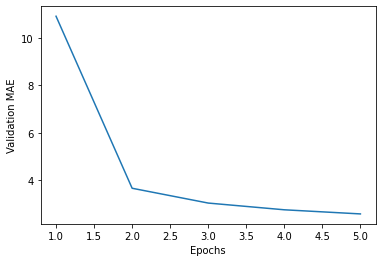

In [ ]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')